Métodos numéricos
Projeto I

Aluno: João Edinaldo Gomes dos Santos Júnior
Professor: Paulo Ribeiro



**Algoritmo de PageRank**

1 - Introdução:

O que é PageRank?

---

Em 1998, os cientistas da computação americanos Larry Page e Sergey Brin propuseram o algoritmo PageRank que levou à criação do mecanismo de busca Google e possibilitou propor uma definição da ideia de "popularidade" de uma página.

O algoritmo PageRank é baseado no princípio de calcular a popularidade de uma página a partir da popularidade das páginas que a citam. 

 Aqui apresentarei uma implementação do algoritmo, ilustrando o funcionamento dele usando grafos gerados a partir da biblioteca networkx.


---

2 - Descrição
 ---



 ---

O algoritmo PageRank gera uma distribuição de probabilidade usada para representar a probabilidade de uma pessoa clicar aleatoriamente nos links e chegar a qualquer página em particular. 

A métrica usada por esse algoritmo leva em conta as páginas da web e links nelas contidas. Considerando que páginas web contenham linhks que enderecem outras, o algoritmo indica um índice de popularidade baseado nas relações de endereçamento entre as paginas da web.

A fim de ilustração, consideremos que a internet seja composta apenas de 4 sites. Estes representados pelo grafo abaixo:
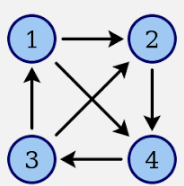

Intuitivamente, seriamos capazes de afirmar que as páginas mais populares seriam as 2 e 4, por conterem o maior número de sites que apontam para elas. Mas o PageRank sugere o contraio.

O problema dessa abordagem – usar o número de links de forma isolada como critério de popularidade – é que não considera a popularidade dos sites que estão apontando para o site de interesse. A simples criação de muitos sites, sem expressão alguma, apontando para o site de interesse, poderia facilmente “inflar” a popularidade desse site, se esse critério fosse utilizado. 

A solução proposta Larry Page e Sergey Brin, fundadores do Google, foi entender cada link dentro de um site A, apontando para outro site B, como sendo um voto proporcional do site A para o site B com respeito à popularidade. Nessa interpretação “democrática” da internet, cada site teria direito a um único voto, de forma que se apontasse para s sites, os votos computados para cada um desses sites seria de fato somente 1/s. Mas isso não levaria em conta a popularidade do site no processo de voto. Então, cada voto (proporcional) seria ponderado pelo índice de popularidade do site,

3 - Métodos Aplicados a solução
---



Para entender a matemática por trás do PageRank, precisamos introduzir um conceito adicional, que é a matriz de links. Trata-se de uma matriz quadrada com dimensões iguais ao número de nós e descreve, para cada nó, seus links interno e externo. Consideremos a matriz nas seguintes direções: 
 
 -**Linhas: demosntram quais os links internos para cada nó**

 -**Colunas: demonstram os links externos para cada nó**

Dado isso, temos a matriz para o grafo mostrado anteriormente:

In [29]:
import numpy as np
A = np.matrix([[0, 0, 1, 0],
              [1, 0, 1, 0],
              [0, 0, 0, 1],
              [1, 1, 0, 0]]
    
              )
A.T

matrix([[0, 1, 0, 1],
        [0, 0, 0, 1],
        [1, 1, 0, 0],
        [0, 0, 1, 0]])

Usando dessa ilustração, o algoritmo segue com o uso da matriz dessa forma:
 
 -**se um nó tiver k arestas de saída, ele passará 1/k de sua importância para cada um dos nós aos quais está vinculado.**

A idéia do PageRank é que, por meio de um processo iterativo, possamos atualizar o vetor de classificação (inicializado com links com o mesmo peso) com a matriz A. Ou seja, a nova probabilidade de nossos sites após uma iteração será o vetor  O vetor  (v' = A.v) resultante após a iteração k é igual a:

        v1 = Av0

    respectivamente:
        
        v2 = A^2v0 = A(Av0) = Av1
    temos assim:

        vk = A^kv0 = Avk-1


    


4 - Implementação

---

Vamo aplicar o algoritmo no exemplo que ilustramos até agora. Para isso faremos uso da biblioteca network, para criação de objetos de representação dos grafos, e a obtenção dos vetores resultados da utilização do PageRank nestes.

In [6]:
import networkx as nx


Modelando o grafo da "mini-internet" apresentado acima:

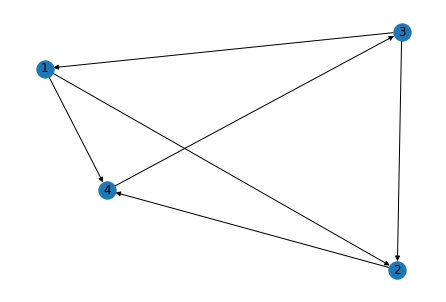

In [7]:
internet = nx.DiGraph()
internet.add_nodes_from([1,2,3,4])
internet.add_weighted_edges_from([(1,2,1), (1,4,1), (2,4, 1),(4,3,1),(3,1,1),(3,2,1)])
nx.draw(internet, with_labels=True)

Agora obtendo a matriz de links desse mesmo exemplo, utilizando a ideia da importância k de cada nó desse grafo.

In [28]:
## "cada linha representando os links internos para cada nó"-sessão 2
k_1 = [0, 0, 1/2, 0] #importancia 1/k do nó 3, sendo k=2 por 3 ter 2 links externos
k_2 = [1/2, 0, 1/2, 0]
k_3 = [0, 0, 0, 1]
k_4 = [1/2,2, 0, 0]

B = np.matrix([k_1, k_2, k_3, k_4])
B

matrix([[0. , 0. , 0.5, 0. ],
        [0.5, 0. , 0.5, 0. ],
        [0. , 0. , 0. , 1. ],
        [0.5, 2. , 0. , 0. ]])

Vale ressaltar o uso de um parâmetro "alfa". É um cosciente chamado de Valor de Amortecimento. O algoritmo deve levar em consideração o fato de que um certo usuário imaginário que clica aleatoriamente nos links acaba parando de clicar. A probabilidade, a qualquer momento, de a pessoa continuar é o fator de amortecimento alfa e o Google o definiu 0,85 como padrão.

Considerando o código abaixo uma implementação do PageRank, que utiliza do processo de iteração citado na sessão 3, a partir das 2 ultimas matrizes já ilustradas. Podemos achar um vetor que indica uma métrica direta de popularidade dos sites. assim podemos comparar diretamente os valores, de maneira a apontar o mais popular

In [33]:
def pagerank(G, alpha=0.85, personalization=None, 
             max_iter=100, tol=1.0e-6, nstart=None, weight='weight', 
             dangling=None): 
    
    if len(G) == 0: 
        return {} 
  
    if not G.is_directed(): 
        D = G.to_directed() 
    else: 
        D = G 
  
    # Create a copy in (right) stochastic form 
    W = nx.stochastic_graph(D, weight=weight) 
    N = W.number_of_nodes() 
  
    # Choose fixed starting vector if not given 
    if nstart is None: 
        x = dict.fromkeys(W, 1.0 / N) 
    else: 
        # Normalized nstart vector 
        s = float(sum(nstart.values())) 
        x = dict((k, v / s) for k, v in nstart.items()) 
  
    if personalization is None: 
  
        # Assign uniform personalization vector if not given 
        p = dict.fromkeys(W, 1.0 / N) 
    else: 
        missing = set(G) - set(personalization) 
        if missing: 
            raise NetworkXError('Personalization dictionary '
                                'must have a value for every node. '
                                'Missing nodes %s' % missing) 
        s = float(sum(personalization.values())) 
        p = dict((k, v / s) for k, v in personalization.items()) 
  
    if dangling is None: 
  
        # Use personalization vector if dangling vector not specified 
        dangling_weights = p 
    else: 
        missing = set(G) - set(dangling) 
        if missing: 
            raise NetworkXError('Dangling node dictionary '
                                'must have a value for every node. '
                                'Missing nodes %s' % missing) 
        s = float(sum(dangling.values())) 
        dangling_weights = dict((k, v/s) for k, v in dangling.items()) 
    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0] 
  
    # power iteration: make up to max_iter iterations 
    for _ in range(max_iter): 
        xlast = x 
        x = dict.fromkeys(xlast.keys(), 0) 
        danglesum = alpha * sum(xlast[n] for n in dangling_nodes) 
        for n in x: 
  
            # this matrix multiply looks odd because it is 
            # doing a left multiply x^T=xlast^T*W 
            for nbr in W[n]: 
                x[nbr] += alpha * xlast[n] * W[n][nbr][weight] 
            x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n] 
  
        # check convergence, l1 norm 
        err = sum([abs(x[n] - xlast[n]) for n in x]) 
        if err < N*tol: 
            return x 
    raise NetworkXError('pagerank: power iteration failed to converge '
                        'in %d iterations.' % max_iter) 

In [34]:
pg = pagerank(internet)
pg

{1: 0.163813582448939,
 2: 0.23343473174786417,
 3: 0.29721012751288056,
 4: 0.30554155829031626}

Assim, Podemos afirmar que do nosso exemplo de mini-internet, o site 4 é o mais popular, apenas comparando os valores resultados do método pagerank.

5 - Casos de uso

---

Acompanhamos a aplicação do algoritmo em um exemplo de certa forma simples, apenas de modo a acompanhar o funcionamento da solução. Acompanhemos a aplicação do algoritmo em um esquema mais extenso, logo, de certa forma, até inviável o acompanhamento dos indices de popularidade intuitiva e não algébrica.

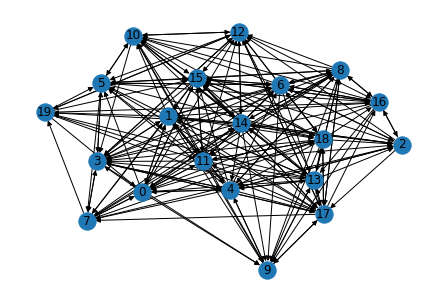

In [38]:
ex_pratico=nx.fast_gnp_random_graph(20,0.5,directed=True)
nx.draw(ex_pratico,with_labels=True)

a fim de referencia, usaremos o método pagerank da biblioteca networkx, para comparação com o método apresentado na sessão 4.

In [44]:
pop_pr = pagerank(ex_pratico)
array_pop = np.array([*pop_pr.values()])

ref = nx.pagerank(ex_pratico)
array_ref = np.array([*ref.values()])

best_nodes = [np.argmax(array_pop), np.argmax(array_ref)]
         
print("Sites mais populares do exemplo: {}, ref:{}".format(best_nodes[0], best_nodes[1]))

Sites mais populares do exemplo: 17, ref:17
